In [2]:
#install.packages("Rlinsolve")
#install.packages("ggplot2")
#install.packages("pracma")

In [3]:
library(RcppArmadillo)
library(Rlinsolve)
library(ggplot2)
library(pracma)

options(repr.plot.width = 12, repr.plot.height = 8)

** ------------------------------------------------------- **

** Rlinsolve

**  - Solving (Sparse) System of Linear Equations

**

** Version    : 0.3.2      (2021)

** Maintainer : Kisung You (kisungyou@outlook.com)

**

** Please share any bugs or suggestions to the maintainer.

** ------------------------------------------------------- **



In [5]:
A <- matrix(c(2, 1,
            5, 7), nrow=2, ncol=2, byrow=T)

A

2,1
5,7


In [6]:
b <- matrix(c(11, 13), nrow=2, ncol=1, byrow=T)

b

11
13


In [8]:
out1 = lsolve.jacobi(A, b, weight=1, verbose=F)

In [10]:
out1$x

7.111043
-3.222196


In [11]:
out1$iter

[1] 401

In [12]:
head(out1$errors)

0.9939542
0.9441379
0.9384299
0.8913964
0.8860073
0.8416012


In [13]:
tail(out1$errors )

"[397,]",1.133404e-05
"[398,]",1.076598e-05
"[399,]",1.070090e-05
"[400,]",1.016457e-05
"[401,]",1.010312e-05
"[402,]",9.596760e-06


In [17]:
error <- out1$errors

iteration <- out1$iter

In [18]:
iter_seq <- seq.int(0, iteration, 1)

iter_seq

[1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
[109] 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
[127] 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
[145] 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
[163] 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
[181] 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
[199] 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
[217] 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
[235] 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
[253] 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
[271] 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
[289] 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
[307] 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
[325] 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
[343] 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
[361] 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
[379] 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
[397] 396 397 398 399 400 401

In [19]:
error_per_iter <- data.frame(iter_seq, error)

head(error_per_iter)

,iter_seq,error
,<dbl>,<dbl>
1,0,0.9939542
2,1,0.9441379
3,2,0.9384299
4,3,0.8913964
5,4,0.8860073
6,5,0.8416012


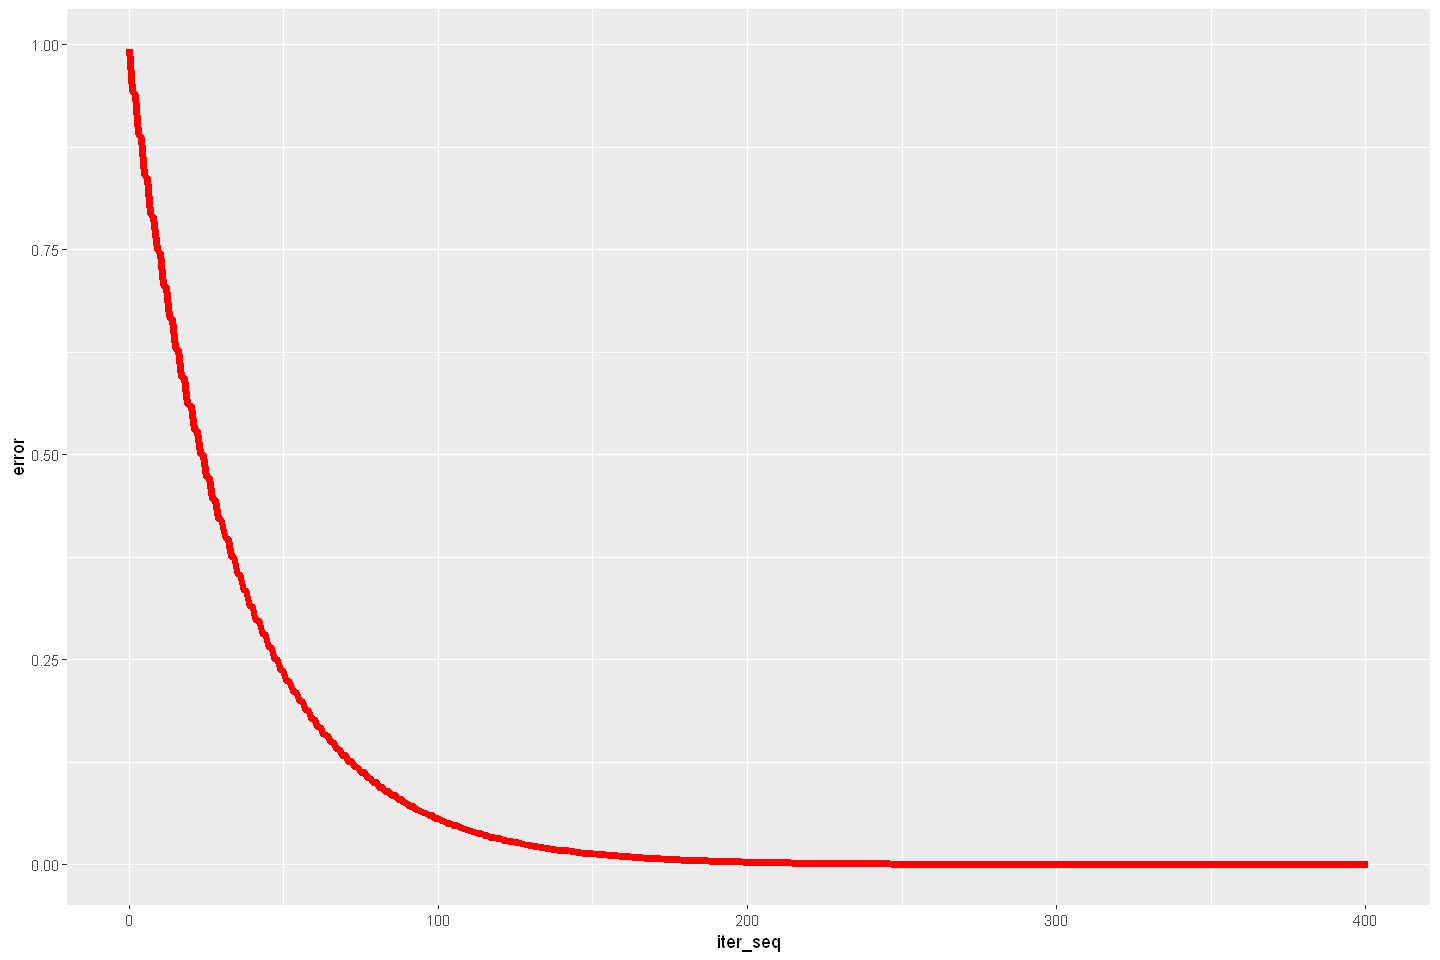

In [20]:
ggplot(error_per_iter, aes(x=iter_seq, y=error)) +
    geom_line(col="red", size=2)

In [21]:
out2 <- lsolve.jacobi(A, b, weight = 0.66, verbose=FALSE)

out2$x

7.109534
-3.221021


In [22]:
error <- out2$errors

iteration <- out2$iter

In [23]:
iter_seq <- seq(0, iteration, 1)

error_per_iter <- data.frame(iter_seq, error)

head(error_per_iter)

,iter_seq,error
,<dbl>,<dbl>
1,0,0.31405007
2,1,0.08857574
3,2,0.04697458
4,3,0.02969921
5,4,0.03099098
6,5,0.02947441


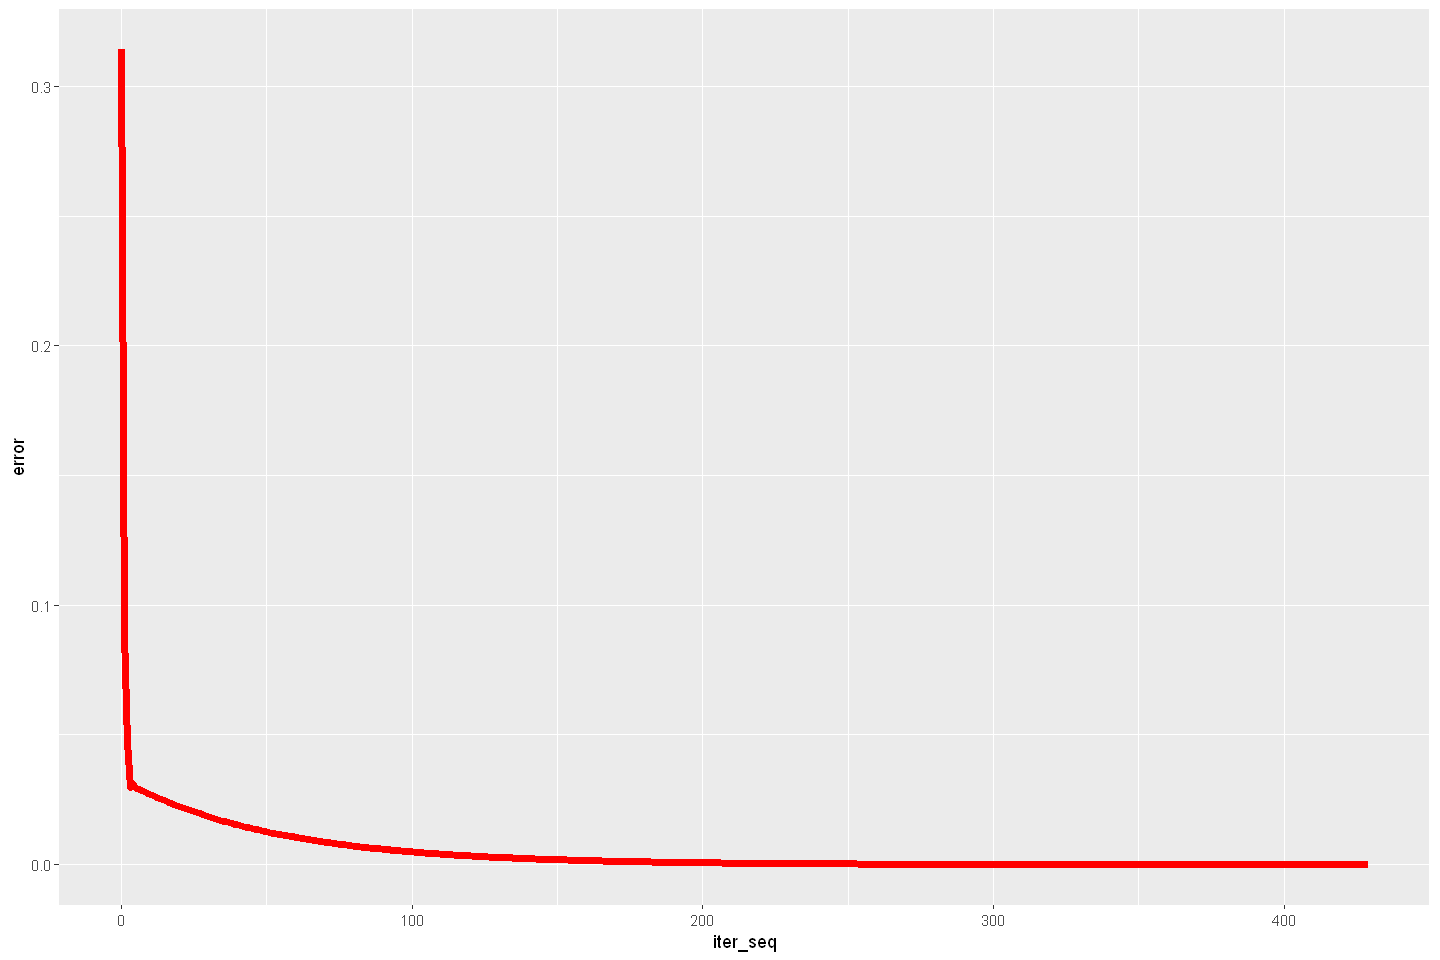

In [24]:
ggplot(error_per_iter, aes(x = iter_seq, y = error)) +
    geom_line(col = "red", size=2)

In [25]:
A <- matrix(c(2, 1,
    5, 7), nrow=2, byrow=T)
A

2,1
5,7


In [27]:
b <- matrix(c(11, 13), nrow=2, ncol=1, byrow=T)
b

11
13


In [28]:
rref(cbind(A, b))

1,0,7.111111
0,1,-3.222222


In [29]:
A <- matrix(c(6, 4, 1,
    1, 4, 2,
    1, 1, 3), nrow=3, byrow=T)

A

6,4,1
1,4,2
1,1,3


In [31]:
b <- matrix(c(24,
11,
10), nrow=3, ncol=1, byrow=T)

b

24
11
10


In [32]:
rref(cbind(A, b))

1,0,0,3
0,1,0,1
0,0,1,2


In [33]:
A <- matrix(c(1, 2,
    5, 4), nrow=2, ncol=2, byrow=TRUE)

A

1,2
5,4


In [34]:
b <- matrix(c(5, 3), nrow=2, ncol=1, byrow=T)
b

5
3


In [35]:
rref(cbind(A, b))

1,0,-2.333333
0,1,3.666667
